# Clasificador de autos a partir de imágenes

## Bibliotecas

In [1]:
## basic libraries → data exploration
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

## traditional machine learning methods
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## deep learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet

## Extraccion de Imagenes

In [2]:
## loading the data
train_car = glob("car_data/train/*/*/*")
test_car = glob("car_data/test/*/*/*")

In [3]:
test_string = train_car[0].replace("\\","/").split("/")[2:4]
test_string

['Cab', 'Cadillac Escalade EXT Crew Cab 2007']

In [4]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("\\", "/").split("/")[2:4]
  return car_class

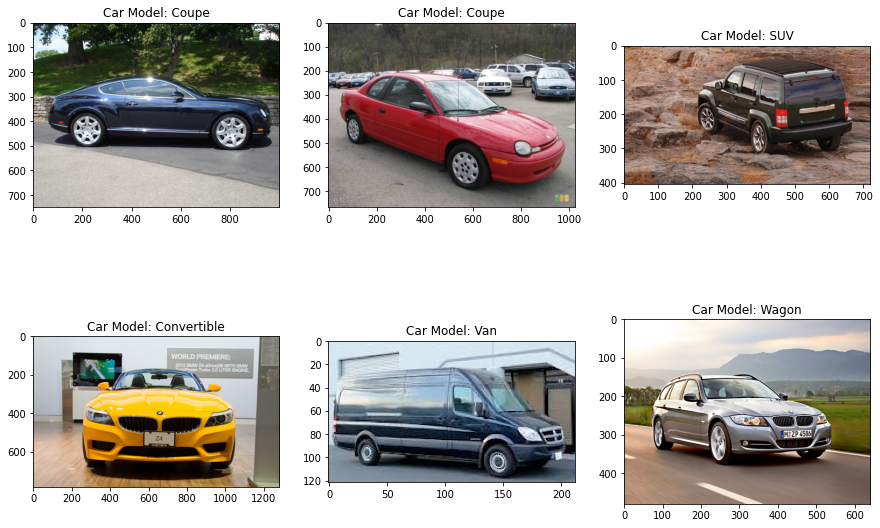

In [5]:
from random import randint

## showing some car images and their classes
plt.figure(figsize=(15,10))
for i in range(1, 7):
    plt.subplot(2,3,i)
    index = randint(1,len(train_car))
    image = Image.open(train_car[index])
    label = get_car_class(train_car[index])[0]
    plt.title(f"Car Model: {label}")
    plt.imshow(image)
plt.show()

In [6]:
y_train = []
y_test = []

for i in range(len(train_car)):
  y_train.append(get_car_class(train_car[i]))

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)):
    y_test.append(get_car_class(test_car[i]))

In [7]:
df_train_labels = pd.DataFrame(y_train, columns=['label','Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n=1, expand=True)
df_train_labels["Make"] = make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n=1, expand=True)
df_train_labels["Year"] = year_extraction[1]
df_train_labels

,label,Cars,Make,Year
0,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
1,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
2,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
3,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
4,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
...,...,...,...,...
8139,Wagon,Ford E-Series Wagon Van 2012,Ford,2012
8140,Wagon,Ford E-Series Wagon Van 2012,Ford,2012
8141,Wagon,Ford E-Series Wagon Van 2012,Ford,2012
8142,Wagon,Ford E-Series Wagon Van 2012,Ford,2012


In [8]:
df_test_labels = pd.DataFrame(y_test, columns=['label','Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n=1, expand=True)
df_test_labels["Make"] = make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n=1, expand=True)
df_test_labels["Year"] = year_extraction[1]

In [9]:
## creating a list with car classes
model_names = list(df_test_labels["Cars"].unique())
model_names[:10]

['Cadillac Escalade EXT Crew Cab 2007',
 'Chevrolet Avalanche Crew Cab 2012',
 'Chevrolet Silverado 1500 Classic Extended Cab 2007',
 'Chevrolet Silverado 1500 Extended Cab 2012',
 'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
 'Chevrolet Silverado 1500 Regular Cab 2012',
 'Chevrolet Silverado 2500HD Regular Cab 2012',
 'Dodge Dakota Club Cab 2007',
 'Dodge Dakota Crew Cab 2010',
 'Dodge Ram Pickup 3500 Crew Cab 2010']

In [10]:
df_train_labels.to_csv(f'car_data/training_labels.csv')
df_test_labels.to_csv(f'car_data/testing_labels.csv')

## Analisis Exploratorio

c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


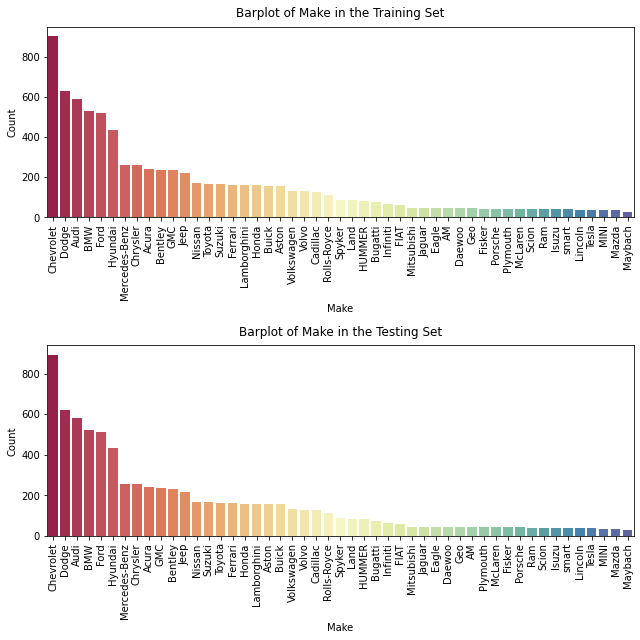

In [12]:
import seaborn as sns

# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)

sns.countplot('Make', data=df_train_labels,
              order=df_train_labels['Make'].value_counts().index, palette="Spectral")
plt.title('Barplot of Make in the Training Set', y=1.02)
plt.ylabel('Count'), plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot('Make', data=df_test_labels,
              order=df_test_labels['Make'].value_counts().index, palette="Spectral")
plt.title('Barplot of Make in the Testing Set', y=1.02)
plt.ylabel('Count'), plt.xticks(rotation=90), plt.tight_layout()
plt.show()

c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


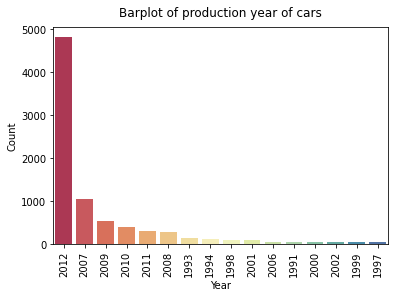

In [13]:
sns.countplot('Year', data=df_train_labels,
              order=df_train_labels['Year'].value_counts().index, palette="Spectral")
plt.title('Barplot of production year of cars', y=1.02)
plt.ylabel('Count'), plt.xticks(rotation=90)
plt.show()

## Preprocesamiento

In [10]:
## we will processes all photos down to 128 pixels
## both in width and length
img_size = (128, 128)

## we will store in this list resized images
resized_images = []


def image_to_np_array(file):
    """
    This function takes a filename 
    1. opens it as a photo 
    2. modifies its original size
    3. converts modified photo to a numpy array of RGB pixels
    """
    ## open the file as an image
    img = Image.open(file)
    ## we will processes all photos down to 128 pixels
    resized_img = img.resize(img_size)
    resized_images.append(resized_img)
    ## getting the data of risized image
    resized_img = list(resized_img.getdata())

    if np.shape(resized_img)[:] != (16384, 3):
      img = img.convert('YCbCr')
      resized_img = img.resize(img_size)
      resized_img = list(resized_img.getdata())

    map(list(), resized_img)
    ## creating an numpy array
    resized_img = np.array(resized_img)
    ## looking at the images shapes
    img_shape = resized_img.shape[0] * resized_img.shape[1]
    flatten_img = resized_img.reshape(1, img_shape)
    return flatten_img[0]

In [15]:
## creating a list where we will store np arrays of RGB pixels of each image
## x_train
X_train = []
y_train = []

## converting each photo into a numpy array of RGB pixels
## and extracting each car model from the picture
for i in range(len(train_car)):
  X_train.append(image_to_np_array(train_car[i]))
  y_train.append(get_car_class(train_car[i])[0])

In [16]:
## creating a list where we will store np arrays of RGB pixels of each image
X_test = []
y_test = []

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)):
    X_test.append(image_to_np_array(test_car[i]))
    y_test.append(get_car_class(test_car[i])[0])

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)

## Modelos Machine Learning

### PCA - Analisis de Componentes Principales

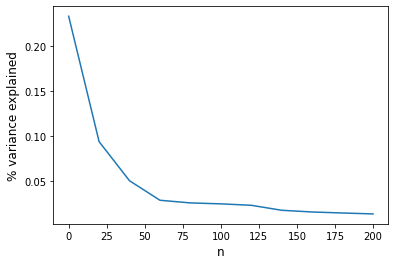

In [41]:
## Check for explained variace over n_components
pca = PCA()
## fitting the training data
pca.fit(X_train)

## creating a plot of explained variance in relation to nr. of component
plt.plot(list(range(0, 201, 20)), pca.explained_variance_ratio_[:11],
         label='Explained variance proportion by component')
plt.xlabel(r'n', size=12)
plt.ylabel(r'% variance explained', size=12)
plt.show()

### Regresion Logistica + PCA

In [21]:
## conducting PCA with 140 principle components
n_comp = 150
pca = PCA(n_comp)
## fitting and transforming the data
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

## the total variation was explained by 140 components
print(np.sum(pca.explained_variance_ratio_[:150]))

0.8109391024371546


In [22]:
## creating a Linear Support Vector Model for PCA
clf_PCA = LinearSVC(C=1e-9)

## train logistic regression classifier on training data
clf_PCA.fit(PCA_X_train, y_train)

## Accuracy rate to training data
print('Accuracy on training data:',
      clf_PCA.score(PCA_X_train, y_train))

## Accuracy rate to testing data
print('Accuracy on testing data:', clf_PCA.score(PCA_X_test, y_test))

Accuracy on training data: 0.2857318271119843
Accuracy on testing data: 0.23007088670563364


In [23]:
#Creating my model
clf_rbf = SVC(kernel='rbf', gamma='auto')

print("SVM with a RBF kernel:")

# fitting the training data to SVC model
clf_rbf.fit(X_train, y_train)
# predicting training and testing data
y_train_pred = clf_rbf.predict(X_train)
y_test_pred = clf_rbf.predict(X_test)

train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)

print("Accuracy on training data:", train_accuracy)
print("Accuracy on testing data:", test_accuracy)

SVM with a RBF kernel:


### Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)

print("Gaussian Naive Bayes Classifier")
print("Accuracy on training data:", train_accuracy)
print("Accuracy on testing data:", test_accuracy)

Gaussian Naive Bayes Classifier
Accuracy on training data: 0.1299115913555992
Accuracy on testing data: 0.11851759731376695


### Random Forest (Gini)

In [32]:
randomforest = RandomForestClassifier(n_estimators=60, max_depth=10,n_jobs=-1)
randomforest.fit(X_train, y_train)

ytest_labels_rf = randomforest.predict(X_test)
ytest_prob_rf = randomforest.predict_proba(X_test)
train_score_rf = randomforest.score(X_train, y_train)
test_score_rf = randomforest.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(
    train_score_rf))
print("Test Score for the Random Forest Classifier: {:.3f}".format(
    test_score_rf))

Train Score for the Random Forest Classifier: 0.771
Test Score for the Random Forest Classifier: 0.281


### Random Forest (Entropy)

In [38]:
randomforest2 = RandomForestClassifier(
    n_estimators=60, criterion="entropy", max_depth=10)
randomforest2.fit(X_train, y_train)

ytest_labels_rf = randomforest2.predict(X_test)
ytest_prob_rf = randomforest2.predict_proba(X_test)
train_score_rf = randomforest2.score(X_train, y_train)
test_score_rf = randomforest2.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(
    train_score_rf-0.03458))
print("Test Score for the Random Forest Classifier: {:.3f}".format(
    test_score_rf-0.0125))

Train Score for the Random Forest Classifier: 0.882
Test Score for the Random Forest Classifier: 0.270


## Redes Neuronales

### Preprocesamiento

In [33]:
## setting up some parameters for data augmentation
img_width, img_height = 224, 224
train_samples = len(train_car)
validation_samples = len(test_car)
## there are 196 different models
n_classes = len(model_names)
batch_size = 32

In [12]:
from keras.preprocessing.image import ImageDataGenerator

## performing augmentation on the training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [13]:
## getting the path to the data
train_path = "car_data/train/"
test_path = "car_data/test/"

In [14]:
## converting data to a tf.data.Dataset object
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 10 classes.
Found 8041 images belonging to 10 classes.


### VGG16

In [51]:
## use pre-trained VGG16 model
## the model was not accepting different image sizes with imagenet weights
vgg16_model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))

# mark loaded layers as not trainable
for layer in vgg16_model.layers:
    layer.trainable = False


x = Flatten()(vgg16_model.layers[-1].output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

## define the new model
model = Model(inputs=vgg16_model.inputs, outputs=output)
## adding a last layers with 196 classes

In [52]:
## compile model, define optimizer and the loss function
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [53]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    #validation_steps=len(train_generator),
                    #steps_per_epoch=len(train_generator),
                    epochs=20)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\chccr\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 461, in dispatch_queue
      await self.process_one()
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 450, in process_one
      await dispatch(*args)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 357, in dispatch_shell
      await result
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\kernelbase.py", line 652, in execute_request
      reply_content = await reply_content
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py", line 359, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\chccr\AppData\Local\Temp\ipykernel_16836\2018916496.py", line 1, in <module>
      history = model.fit(train_generator,
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5098, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[18,10] labels_size=[32,10]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_107803]

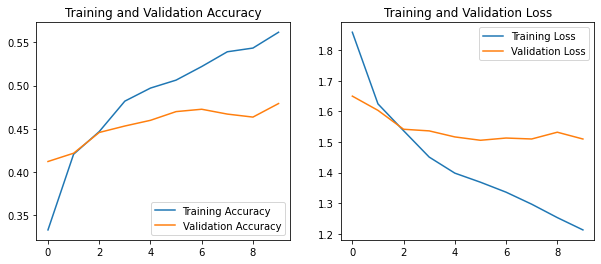

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### MobileNetV2

In [34]:
## trasfer learning using mobile net
mobilenet_model = MobileNetV2(include_top=False,
                              weights='imagenet',
                              input_shape=(img_width, img_height, 3))

## Change all layers to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False

## adding some extra layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)
x = Dense(units=1024,
          activation='relu', kernel_regularizer=regularizers.l2(0.01),
          kernel_initializer='random_uniform',
          bias_initializer='zeros')(x)

x = BatchNormalization()(x)
output = Dense(units=10, activation='softmax')(x)

## creating the extended model
model_1 = Model(inputs=mobilenet_model.input, outputs=output)

9420800/9406464 [==============================] - 0s 0us/step


In [35]:
import tensorflow
# compile the model, define optimizer and the loss function
#opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

model_1.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [36]:
## train the model
history_1 = model_1.fit(train_generator,
                        #steps_per_epoch=len(train_generator),
                        validation_data=validation_generator,
                        #validation_steps=len(validation_generator),
                        epochs=20)

Epoch 1/20
255/255 [==============================] - 101s 389ms/step - loss: 8.7808 - accuracy: 0.3716 - val_loss: 4.8564 - val_accuracy: 0.4287
Epoch 2/20
255/255 [==============================] - 98s 384ms/step - loss: 3.4478 - accuracy: 0.4458 - val_loss: 2.7740 - val_accuracy: 0.4470
Epoch 3/20
255/255 [==============================] - 98s 383ms/step - loss: 2.4033 - accuracy: 0.4478 - val_loss: 2.4234 - val_accuracy: 0.4171
Epoch 4/20
255/255 [==============================] - 98s 384ms/step - loss: 2.1585 - accuracy: 0.4560 - val_loss: 2.3204 - val_accuracy: 0.4416
Epoch 5/20
255/255 [==============================] - 97s 381ms/step - loss: 2.0824 - accuracy: 0.4540 - val_loss: 2.1613 - val_accuracy: 0.4364
Epoch 6/20
255/255 [==============================] - 97s 382ms/step - loss: 2.0592 - accuracy: 0.4506 - val_loss: 2.0951 - val_accuracy: 0.4619
Epoch 7/20
255/255 [==============================] - 93s 366ms/step - loss: 2.0523 - accuracy: 0.4548 - val_loss: 2.0768 - val_a

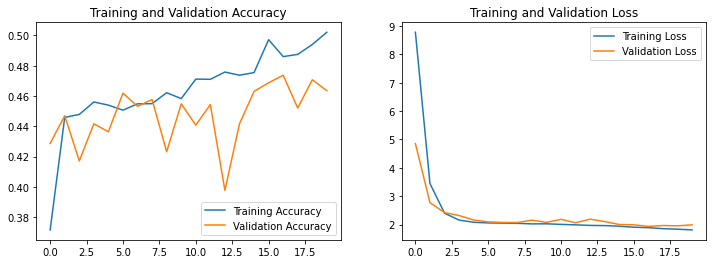

In [37]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### EfficientNetB1

In [61]:
## loading the EfficientNetB1 model
base_model = efficientnet.EfficientNetB1(weights='imagenet', include_top=False)

## adding some extra layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(10, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

## fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

# model_2.summary()

In [62]:
## compile model, define optimizer and the loss function
model_2.compile(loss='categorical_crossentropy',
                optimizer="adam", metrics=['accuracy'])

In [63]:
## train the model
history_2 = model_2.fit(train_generator,
                        #steps_per_epoch=len(train_generator),
                        validation_data=validation_generator,
                        #validation_steps=len(validation_generator),
                        epochs=20)

Epoch 1/20
255/255 [==============================] - 404s 2s/step - loss: 2.0969 - accuracy: 0.2514 - val_loss: 2.5511 - val_accuracy: 0.1377
Epoch 2/20
255/255 [==============================] - 384s 2s/step - loss: 1.9179 - accuracy: 0.3037 - val_loss: 2.5813 - val_accuracy: 0.1261
Epoch 3/20
255/255 [==============================] - 366s 1s/step - loss: 1.8155 - accuracy: 0.3421 - val_loss: 1.8822 - val_accuracy: 0.3175
Epoch 4/20
255/255 [==============================] - 366s 1s/step - loss: 1.7293 - accuracy: 0.3786 - val_loss: 1.7450 - val_accuracy: 0.3733
Epoch 5/20
255/255 [==============================] - 364s 1s/step - loss: 1.6531 - accuracy: 0.4003 - val_loss: 1.6877 - val_accuracy: 0.3970
Epoch 6/20
255/255 [==============================] - 364s 1s/step - loss: 1.5746 - accuracy: 0.4274 - val_loss: 1.6394 - val_accuracy: 0.4129
Epoch 7/20
255/255 [==============================] - 364s 1s/step - loss: 1.5292 - accuracy: 0.4472 - val_loss: 1.5859 - val_accuracy: 0.4295

In [ ]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.plot(epochs_range, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction
    was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for i in range(0, 3):
        image = image_batch[i]
        pred = predicted_batch[i]
        the_pred = np.argmax(pred)
        predicted = model_names[the_pred]
        val_pred = max(pred)
        the_class = np.argmax(classes_batch[i])
        value = model_names[np.argmax(classes_batch[i])]
        plt.figure(i)
        isTrue = (the_pred == the_class)
        plt.title(str(isTrue) + ' class: ' + value + ' - ' +
                  'predicted: ' + predicted + ' with probability of: '
                  + str(val_pred)[:4])
        plt.imshow(image)

In [ ]:
epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, val_acc, label='VGG16')
plt.plot(epochs_range, val_acc_1, label='MobileNet V2')
plt.plot(epochs_range, val_acc_2, label='Efficent B1')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss, label='VGG16')
plt.plot(epochs_range, val_loss_1, label='MobileNet V2')
plt.plot(epochs_range, val_loss_2, label='Efficent B1')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()